In [67]:
from Portfolio import Portfolio, universe # universe is a global variable
# and each portfolio can access to the universe
from Admin import Admin, MeanReturn, MoneyWeightedReturn,SimpleReturn,TimeWeightedReturn,Volatility,ReturnAttribCurrency,PortfolioVaR,MarginalVaRs
import pandas as pd
from Scenario import get_scenario_defining_returns, cond_means_of_factors
from datetime import datetime
import numpy as np
import numpy.linalg as la

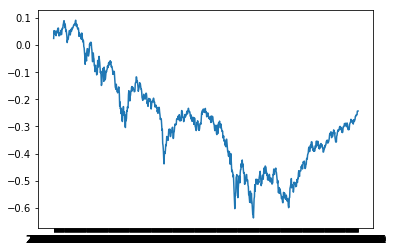

In [12]:
from matplotlib import pyplot as plt
plt.plot(np.cumsum(universe.get_risk_factors()['Mkt-RF_log'].price['2000-06-01':'2004-01-01']))

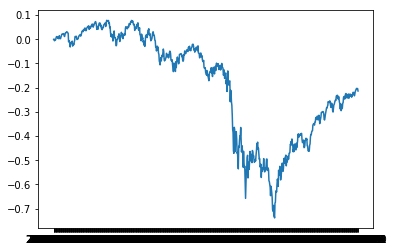

In [3]:
plt.plot(np.cumsum(universe.get_risk_factors()['Mkt-RF_log'].price['2007-01-01':'2010-01-01']))

We are in a good state, target weights with short selling returned


([(0.127, 0.127)],
 [{'MRD.TO': 0.08055269898953041,
   'CIM.AX': -0.029362357306129447,
   'GAPSX': 1.1187369399445004,
   'LNC': -0.3062284640854931,
   'KNEBV.HE': 0.13630118245759176}])

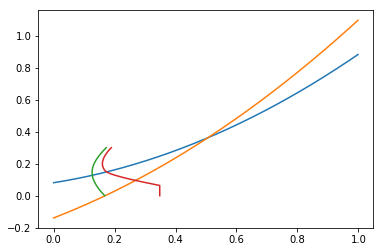

In [77]:
test_admin=Admin()
test_admin.suggestPortfolio('1','2014-04-01')

In [78]:
test_admin.acceptPortfolio(0)
test_admin.trackPortfolio()

In [79]:
start_date='2014-04-01'
today_date='2019-06-01'

In [80]:
betas,var_tmp=PortfolioVaR(test_admin,start_date,test_admin.today,False)

In [81]:
betas

,Mkt-RF_log,SMB_log,HML_log,RMW_log,CMA_log,Mkt-RF_log_global,SMB_log_global,HML_log_global,RMW_log_global,CMA_log_global,...,US IG 5-10 yr,CGOV 10y,CGOV 5y,CGOV 2y,Gold,Crude Oil,US Real Estate,CAN Real Estate,Toronto Real Estate,VIX
MRD.TO,0,0,0,0,0,0.181109,-0.11905,-0.0622143,-0.589342,-0.541585,...,0,0,0,0,0,0,0,0,0,0
CIM.AX,0,0,0,0,0,0.366193,-0.631117,0.502701,-0.221197,-0.717091,...,0,0,0,0,0,0,0,0,0,0
GAPSX,0.990506,-0.0847546,0.0979517,0.08088,0.0194918,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LNC,1.54335,0.0722288,1.39972,-0.623523,-0.708468,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KNEBV.HE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
financial_crisis_midpoint=np.cumsum(universe.get_risk_factors()['Mkt-RF_log'].price['2007-06-01':'2010-01-01'])[np.cumsum(universe.get_risk_factors()['Mkt-RF_log'].price['2007-06-01':'2010-01-01'])==np.cumsum(universe.get_risk_factors()['Mkt-RF_log'].price['2007-06-01':'2010-01-01']).min()].index[0]
asian_crisis_midpoint=np.cumsum(universe.get_risk_factors()['Mkt-RF_log'].price['2000-06-01':'2004-01-01'])[np.cumsum(universe.get_risk_factors()['Mkt-RF_log'].price['2000-06-01':'2004-01-01'])==np.cumsum(universe.get_risk_factors()['Mkt-RF_log'].price['2000-06-01':'2004-01-01']).min()].index[0]

In [83]:
factors_cov=universe.get_risk_factors_cov(start_date,252*5,annualize=False)
financial_crisis_midpoint

'2009-03-09'

In [9]:
scenario_def=get_scenario_defining_returns(financial_crisis_midpoint)

In [11]:
cond_means_of_factors=cond_means_of_factors(scenario_def,factors_cov)

In [24]:
reinexed_betas=betas.reindex(columns=cond_means_of_factors.columns,fill_value=0)
sec_returns_in_crisis=pd.DataFrame(np.matmul(np.array(reinexed_betas).astype(float),np.array(cond_means_of_factors).transpose().astype(float)),
                                  index=reinexed_betas.index,columns=cond_means_of_factors.index)
sec_returns_in_crisis

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
HBD.TO,-0.030940,-0.009128,-0.090048,0.103260,0.017791,0.032422,0.173067,0.246441,0.130305,0.080174,...,-0.061678,-0.000461,-0.063152,-0.116293,-0.035563,-0.008166,-0.117376,0.027295,0.004756,0.078578
HGU.TO,0.026280,0.149392,0.174039,-0.051645,0.026574,-0.018540,0.255633,0.098603,-0.116327,-0.500369,...,-0.161058,0.064426,-0.019526,-0.050200,0.036316,-0.056096,-0.009426,0.110609,-0.000368,0.218063
OIH,0.052611,0.054965,-0.002281,-0.103972,0.010151,0.035896,-0.050184,-0.233173,-0.112497,-0.044927,...,0.049499,0.033745,0.023796,0.062893,0.058056,0.022068,0.000829,0.019057,0.065544,-0.043931
RIT.TO,0.007477,0.010432,0.015415,-0.020778,0.000292,-0.001545,-0.011924,-0.039822,-0.025067,-0.029224,...,0.004243,0.004949,0.006814,0.014710,0.009440,0.000522,0.010506,0.003577,0.004116,-0.001978
EMB,0.013166,0.012026,0.013922,-0.018612,-0.002285,0.001646,-0.014360,-0.039108,-0.034068,-0.032978,...,0.004859,0.005538,0.012547,0.016230,0.009728,0.000636,0.018975,-0.002938,0.008290,-0.013956


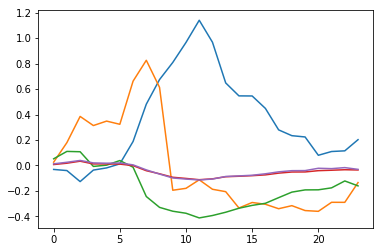

In [27]:
from matplotlib import pyplot as plt
for item in sec_returns_in_crisis.index:
    plt.plot(sec_returns_in_crisis.add(1).cumprod(axis=1).subtract(1).loc[item])
    

In [51]:
prices_today=[]
for item in sec_returns_in_crisis.index:
    prices_today.append(universe.get_security(item).price['2019-06-01'])
# prices_today
amounts_today=[np.float(list(test_admin.portfolio['2019-06-01'].portfolio.values())[i]) for i in range(0,5)]

In [73]:
cum_returns_in_crisis=sec_returns_in_crisis.add(1).cumprod(axis=1).subtract(1)
cum_pnl_in_crisis=cum_returns_in_crisis.multiply(prices_today,axis=0).multiply(amounts_today,axis=0)

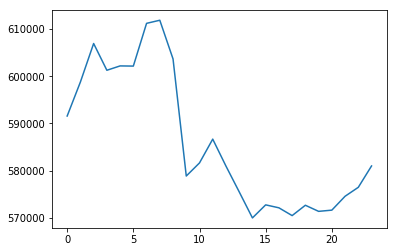

In [61]:
plt.plot(cum_pnl_in_crisis.sum().add(np.float(test_admin.getAccountValue('2019-06-01'))))

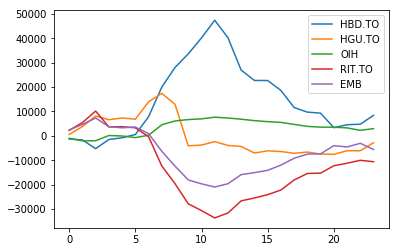

In [63]:
for item in cum_pnl_in_crisis.index:
    plt.plot(cum_pnl_in_crisis.loc[item])
plt.legend(cum_pnl_in_crisis.index)

In [70]:
def run_scenario(account,scenario_num,today_date='2019-06-01'):
    financial_crisis_midpoint=np.cumsum(universe.get_risk_factors()['Mkt-RF_log'].price['2007-06-01':'2010-01-01'])[np.cumsum(universe.get_risk_factors()['Mkt-RF_log'].price['2007-06-01':'2010-01-01'])==np.cumsum(universe.get_risk_factors()['Mkt-RF_log'].price['2007-06-01':'2010-01-01']).min()].index[0]
    asian_crisis_midpoint=np.cumsum(universe.get_risk_factors()['Mkt-RF_log'].price['2000-06-01':'2004-01-01'])[np.cumsum(universe.get_risk_factors()['Mkt-RF_log'].price['2000-06-01':'2004-01-01'])==np.cumsum(universe.get_risk_factors()['Mkt-RF_log'].price['2000-06-01':'2004-01-01']).min()].index[0]
    if scenario_num==0:
        crisis_midpoint=asian_crisis_midpoint
    elif scenario_num==1:
        crisis_midpoint=financial_crisis_midpoint
    else:
        print("ERROR: No scenario found. Please choose one of: 0, 1")
        return
    factors_cov=universe.get_risk_factors_cov('2014-04-01',252*5,annualize=False)
    scenario_def=get_scenario_defining_returns(crisis_midpoint)
    cond_means=cond_means_of_factors(scenario_def,factors_cov)
    betas,var_tmp=PortfolioVaR(account,'2014-04-01',today_date,False)
    reinexed_betas=betas.reindex(columns=cond_means.columns,fill_value=0)
    sec_returns_in_crisis=pd.DataFrame(np.matmul(np.array(reinexed_betas).astype(float),np.array(cond_means).transpose().astype(float)),
                                  index=reinexed_betas.index,columns=cond_means.index)
    prices_today=[]
    for item in sec_returns_in_crisis.index:
        prices_today.append(universe.get_security(item).price[today_date])
    # prices_today
    amounts_today=[np.float(list(account.portfolio[today_date].portfolio.values())[i]) for i in range(0,5)]
    cum_returns_in_crisis=sec_returns_in_crisis.add(1).cumprod(axis=1).subtract(1)
    cum_pnl_in_crisis=cum_returns_in_crisis.multiply(prices_today,axis=0).multiply(amounts_today,axis=0)
    port_cum_pnl_if_crisis_repeats_now=cum_pnl_in_crisis.sum().add(np.float(account.getAccountValue(today_date)))
    plt.figure()
    plt.plot(cum_pnl_in_crisis.sum().add(np.float(account.getAccountValue(today_date))))
    plt.figure()
    for item in cum_pnl_in_crisis.index:
        plt.plot(cum_pnl_in_crisis.loc[item])
    plt.legend(cum_pnl_in_crisis.index)
    return cum_pnl_in_crisis, port_cum_pnl_if_crisis_repeats_now

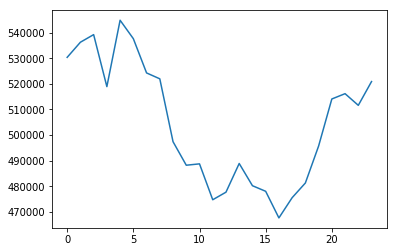

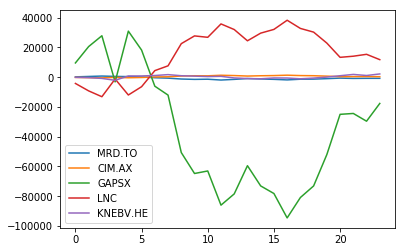

In [84]:
pnl_sec_asian_crisis,pnl_portf_asian_crisis=run_scenario(test_admin,0)

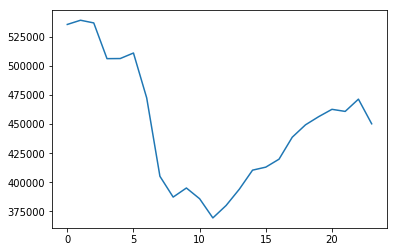

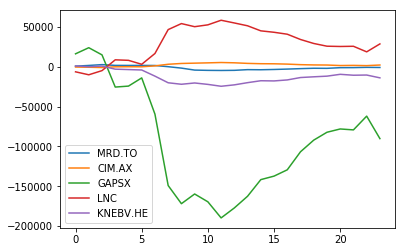

In [85]:
pnl_sec_financial_crisis,pnl_portf_financial_crisis=run_scenario(test_admin,1)

In [86]:
pnl_sec_asian_crisis.to_csv('/Users/jkhai/RoboAdvisor/Reports/pnl_sec_asian_crisis.csv')
pnl_portf_asian_crisis.to_csv('/Users/jkhai/RoboAdvisor/Reports/pnl_portf_asian_crisis.csv')
pnl_sec_financial_crisis.to_csv('/Users/jkhai/RoboAdvisor/Reports/pnl_sec_financial_crisis.csv')
pnl_portf_financial_crisis.to_csv('/Users/jkhai/RoboAdvisor/Reports/pnl_portf_financial_crisis.csv')